# Research of cAlgo exported TICK data

### Extracting from cAlgo
used this cBot to export data: http://ctdn.com/algos/cbots/show/588

had to change c# code slightly to extract Bid & Ask but not from depth.<br>
logic: when backtesting on cAlgo, it uses Bid & Ask without knowledge of depth<br>
also: <strong>spread</strong> is simple ASK - BID calculation performed during export

## Python Code:

In [15]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
### creating inputs:
pair = "GBPUSD"

folder = "../data/"
csv = folder + pair +'-ticks.csv'

print csv

../data/GBPUSD-ticks.csv


content of csv file:

date,ask,bid,spread<br>
2013-04-26 15:16:54.372,1.226800,1.226670,0.000130<br>
2013-04-26 15:16:54.583,1.226820,1.226690,0.000130<br>
2013-04-26 15:16:54.583,1.226810,1.226690,0.000120


In [17]:
### Importing csv file

usecols = ['date', 'ask', 'bid']
#dtypes = {'date':pd.tslib.Timestamp, 'ask':np.float32, 'bid':np.float32, }
data = pd.read_csv(csv,
                   header = False,
                   usecols = usecols,
                   #dtype=dtypes,
                   parse_dates=['date']
                   #date_parser = dateparse
                   )




In [18]:
### compute spread and convert to pips (not points)
data['spreadPips'] = (data.ask - data.bid)*10000

In [19]:
#display what we have
data.head()

,date,ask,bid,spreadPips
0,2013-04-26 15:09:14.405,1.54854,1.54852,0.2
1,2013-04-26 15:09:14.617,1.54851,1.54848,0.3
2,2013-04-26 15:09:15.124,1.54851,1.54847,0.4
3,2013-04-26 15:09:15.124,1.54848,1.54847,0.1
4,2013-04-26 15:09:21.919,1.54847,1.54846,0.1


## Interesting bit:

In [20]:
###copy all negative spreads
neg = data[data.spreadPips < 0]

In [21]:
many = '{0:,}'.format(neg.spreadPips.count())
print "So we have %s records with negative Spread!"  %many

So we have 1,548,876 records with negative Spread!


# So many ticks with negative spread?!?

(array([  6.00000000e+00,   9.80000000e+01,   3.36000000e+02,
          6.46000000e+02,   1.20000000e+03,   1.48100000e+03,
          7.30400000e+03,   1.55510000e+04,   7.92710000e+04,
          1.44298300e+06]),
 array([ -1.12900000e+02,  -1.01620000e+02,  -9.03400000e+01,
         -7.90600000e+01,  -6.77800000e+01,  -5.65000000e+01,
         -4.52200000e+01,  -3.39400000e+01,  -2.26600000e+01,
         -1.13800000e+01,  -1.00000000e-01]),
 <a list of 10 Patch objects>)

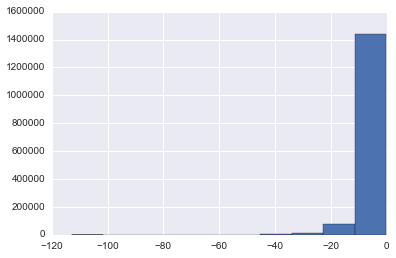

In [22]:
plt.hist(neg.spreadPips.values, bins = 10)

## Let's zoomin on numbers below -20pip

(array([  6.00000000e+00,   5.30000000e+01,   2.20000000e+02,
          2.47000000e+02,   7.67000000e+02,   9.29000000e+02,
          9.06000000e+02,   3.47100000e+03,   9.33300000e+03,
          1.83010000e+04]),
 array([-112.9 , -103.61,  -94.32,  -85.03,  -75.74,  -66.45,  -57.16,
         -47.87,  -38.58,  -29.29,  -20.  ]),
 <a list of 10 Patch objects>)

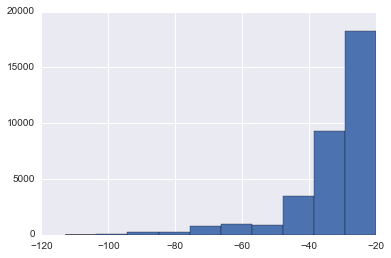

In [23]:
neg1 = neg[neg.spreadPips < -20]
plt.hist(neg1.spreadPips.values)

## Lets zoomin below -50 pips (not points)

(array([   2.,   13.,   45.,  137.,  184.,  174.,  397.,  775.,  578.,  526.]),
 array([-112.9 , -106.61, -100.32,  -94.03,  -87.74,  -81.45,  -75.16,
         -68.87,  -62.58,  -56.29,  -50.  ]),
 <a list of 10 Patch objects>)

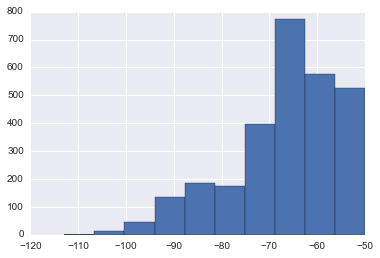

In [24]:
neg2 = neg[neg.spreadPips < -50]
plt.hist(neg2.spreadPips.values)

# Lets see entries for below -100 pips!

In [35]:
neg3 = neg[neg.spreadPips < -90]
print "We have %s ticks with spread below -100 pips! " %neg3.spreadPips.count()


We have 117 ticks with spread below -100 pips! 


In [36]:
neg3.head(100)

,date,ask,bid,spreadPips
25820415,2015-06-03 08:25:25.874,1.52630,1.53536,-90.6
26041161,2015-06-05 12:07:03.798,1.52356,1.53262,-90.6
26041196,2015-06-05 12:07:14.883,1.52283,1.53254,-97.1
26041197,2015-06-05 12:07:14.883,1.52341,1.53254,-91.3
26041198,2015-06-05 12:07:15.694,1.52341,1.53256,-91.5
26041208,2015-06-05 12:07:18.576,1.52270,1.53254,-98.4
26041209,2015-06-05 12:07:19.383,1.52270,1.53260,-99.0
26041210,2015-06-05 12:07:19.383,1.52273,1.53260,-98.7
26041211,2015-06-05 12:07:19.817,1.52273,1.53258,-98.5
26041212,2015-06-05 12:07:19.817,1.52261,1.53258,-99.7
